__Title__: Reinforcement Learning with OpenAI gym  
__Author__: Pablo Carrera Flórez de Quiñones  
__License__:  GNU General Public License v3.0  

# Preliminary Work

## Reinforcement Learning

## OpenAI gym

OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. There are two basic concepts in reinforcement learning: the environment (namely, the outside world) and the agent (namely, the algorithm). The agent sends actions to the environment, and the environment replies with observations and rewards. This gym open-source library gives access to a standardized set of environments, but makes no assumptions about the structure of the agent, it is compatible with any numerical computation library, such as TensorFlow or Theano.

OpenAI Gym include many different enviroments:
* __Classic control and toy text__: complete small-scale tasks, mostly from the RL literature. They’re here to get you started.
* __Algorithmic__: perform computations such as adding multi-digit numbers and reversing sequences. These tasks are easy for a computer, but the challenge is to learn these algorithms purely from examples. These tasks have the nice property that it’s easy to vary the difficulty by varying the sequence length.
* __Atari__: play classic Atari games. 
* __2D and 3D robots__: control a robot in simulation. These tasks use the MuJoCo physics engine, which was designed for fast and accurate robot simulation. MuJoCo is proprietary software, but offers free trial license.

Some of the easy enviroments that can be proven here are:
* __Classic__: These are a variety of classic control tasks, which would appear in a typical reinforcement learning textbook.
    * CartPole
    * MountainCar
    * MountainCarContinuous
    * Pendulum
    * Acrobot
* __Toy Text__: Toy environments which are text-based.
    * Blackjack
    * KellyCoinflip
    * KellyCoinflipGeneralized
    * FrozenLake
    * FrozenLake8x8
    * CliffWalking
    * NChain
    * Roulette
    * Taxi
    * GuessingGame
    * HotterColder
* __Algorithmic__: These are a variety of algorithmic tasks, such as learning to copy a sequence.
    * Copy
    * RepeatCopy
    * ReversedAddition
    * ReversedAddition3
    * DuplicatedInput
    * Reverse

## Libraries

In [3]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
from collections import defaultdict

# OpenAI gym
import gym

## References

* Books:
    *  Richard S. Sutton and Andrew G. Barto. Reinforcement Learning: An Introduction. 2nd. Adaptive Computation and Machine Learning. MIT Press, 2018. ISBN: 9780262039246.
* Repositories
    * https://github.com/openai/gym  
    * https://github.com/dennybritz/reinforcement-learning


# Dynamic programming

## The Taxi enviroment

First we are going to study how a enviroment works by looking at one simple example, the Taxi enviroment. The purpose of this game is to pick-up the coloured individuals and transport them to their destiny. We first create the enviroment

In [2]:
env = gym.make("Taxi-v2") 

and explore some basic funcionalities:
* __env.render()__: shows a graphical representation of the game.
* __env.reset()__: resets the enviroment to some random initial point.
* __env.close()__: 

In [3]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



We can also use other methods to study the specifications of the enviroment:
* __env.observation_space__: number of possible states in the system.
* __env.action_space__: number of possible actions in each state.
* __reward_range__: range for the possible reward of an action.

In [4]:
print("observation_space: {}".format(env.observation_space))
print("action_space: {}".format(env.action_space))
print("reward_range: {}".format(env.reward_range))

observation_space: Discrete(500)
action_space: Discrete(6)
reward_range: (-inf, inf)


where we see that we have a discrete set of 500 possible states and a discrete set of actions (namely up, down, left, rigth, pick-up and drop).

### Random play

With this in mind we can start playing the game randomly, for this we need to use __env.step(action = )__, wich applies a given action to the enviroment. The action should be available in the given state. This function returns four values:
* _observation_: an environment-specific object representing the corresponding id of our state in the observation space.
* _reward_: amount of reward achieved by the previous action.
* _done_: whether it’s time to reset the environment again.
* _info_: diagnostic information useful for debugging.

So, as a first approximation we are going to develop an agent who takes random decissions:

In [5]:
# Reset the enviroment
env.reset()

# Initialize the counters and the lists
counter = 0
reward  = 0

data = pd.DataFrame(columns = ["State", "Reward", "CumulativeReward","Action"])
data = data.append({"State": env.s,
                    "Reward": reward,
                    "CumulativeReward": 0,
                    "Action" : np.nan
                    }, ignore_index=True)

# Run the loop
while counter < 200 :
    
    # Apply a random available action
    action = env.action_space.sample()
    state, reward, done, info = env.step(action = action)
    
    # Save the data
    data = data.append({"State": state,
                        "Reward": reward,
                        "CumulativeReward": sum(data.Reward) + reward,
                        "Action" : action
                        }, ignore_index=True)
    
    # Render
    print("Step {}:".format(counter))
    env.render()
        
    # Produce the next step or finish
    if done == True:
        break # Timeout of the enviroment
    else:
        counter += 1
        reward = sum(data.Reward)

Step 0:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 1:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 2:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 3:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 4:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Step 5:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Step 6:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Step 7:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 8:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 9:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+----

Step 88:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 89:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 90:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 91:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 92:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 93:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step 94:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Step 95:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 96:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 97:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y

Step 165:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step 166:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 167:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Step 168:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 169:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 170:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step 171:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 172:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 173:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 174:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | 

Where we can see that the random actions are not making the agent closer to the goal of the game. This can be seen better in the evolution of `CumulativeReward`, which shows the accumulated value of reward

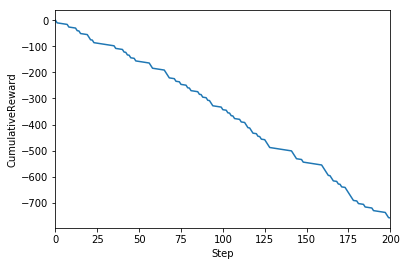

In [6]:
data.CumulativeReward.plot()
plt.xlabel("Step")
plt.ylabel("CumulativeReward")
plt.show()

where we can see that random choices are, almost always, bad decisions.

### Play until done

We have seen that random actions are far for producig a satisfactory strategy, but we need to know how far. In order to study this, we are going to unlimit the number of maximum steps of the game. With this we can study the distribution of the duration of the games. First we define a function to run the episodes

In [7]:
# Define the run of a model
def run_episode_without_policy(env):
    # Reset the enviroment
    state = env.reset()
    
    # Initialize the counters and the lists
    counter = 0
    reward  = 0

    data = pd.DataFrame(columns = ["State", "Reward", "CumulativeReward","Action"])
    data = data.append({"State": env.s,
                        "Reward": reward,
                        "CumulativeReward": 0,
                        "Action" : np.nan
                        }, ignore_index=True)
    
    # Run the loop
    while reward != 20 :
    
        # Apply a random available action
        action = env.action_space.sample()
        state, reward, done, info = env.step(action = action)
    
        # Save the data
        data = data.append({"State": state,
                            "Reward": reward,
                            "CumulativeReward": sum(data.Reward) + reward,
                            "Action" : action
                            }, ignore_index=True)
    
        # Produce the next step or finish
        if reward == 20:
            break # Timeout of the enviroment
        else:
            counter += 1
            reward = sum(data.Reward) 
    
    return data

and run 1000 episodes

In [8]:
# Initialize the counters and the lists
data_episodes = pd.DataFrame(columns = ["Counter", "CumulativeReward"])

# Run the loop
for counter_episodes in range(1000):
    
    # Run a episode
    results = run_episode_without_policy(env)
    
    # Save the data
    data_episodes = data_episodes.append({"Counter": results.shape[0],
                                          "CumulativeReward": results.iloc[-1,3]
                                         }, ignore_index = True)

so we can see the distribution of the duration of the games

In [9]:
def plot_espisodes(data_episodes):
    
    plt.figure(figsize = (20,5))
    
    # Plot evolution of duration
    plt.subplot(1,2,1)
    plt.plot(data_episodes.Counter)
    plt.axhline(data_episodes.Counter.mean(), 0, 1000, c = "r", ls = "--")
    plt.xlabel("Episode")
    plt.ylabel("Counts")
    plt.title("Evolution of duration. Mean: {:0.0f}".format(data_episodes.Counter.mean()), weight = "bold")
    
    # Plot distribution of duration
    plt.subplot(1,2,2)
    sns.distplot(data_episodes.Counter.tolist(), bins = 20, kde = False)
    plt.axvline(data_episodes.Counter.mean(), 0, 500, c = "r", ls = "--")
    plt.xlabel("Duration")
    plt.ylabel("Counts")
    plt.title("Distribution of duration. Mean: {:0.0f}".format(data_episodes.Counter.mean()), weight = "bold")
    plt.show()

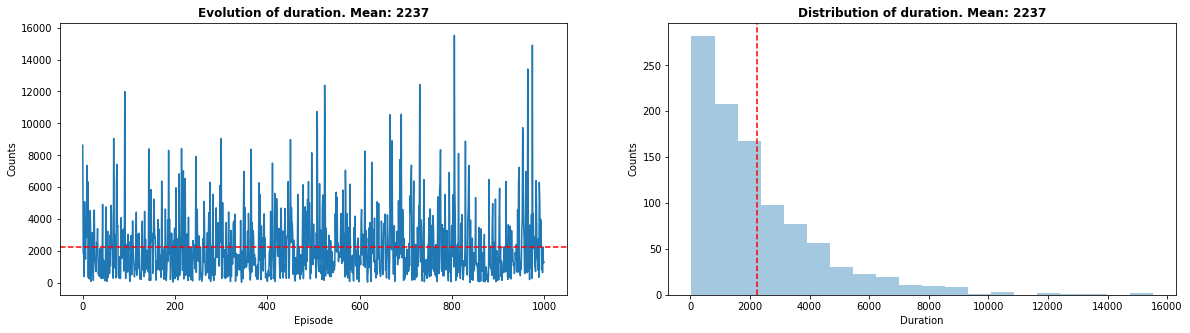

In [10]:
plot_espisodes(data_episodes)

where we can see that the durations of the games are completely random, and their distribution is approximately exponential. The mean duration of the games is very far from the 200 limit that is proposed for this enviroment.

Now we know what our actions are doing to the environment in each step, so we want to study how to do better than take random actions.  OpenAI Gym focuses on the episodic setting of reinforcement learning, where the agent’s experience is broken down into a series of episodes. In each episode, the agent’s initial state is randomly sampled from a distribution, and the interaction proceeds until the environment reaches a terminal state. The goal in episodic reinforcement learning is to maximize the expectation of total reward per episode, and to achieve a high level of performance in as few episodes as possible.

In order to achieve this, we are going to develop some functions to implement and improve policies. A policy $\pi$ is a mapping from states to probabilities of selecting actions, so $\pi(a|s)$ denotes the probabily of chosing action $a$ in state $s$.

## Policy iteration

### Policy evaluation

First we have to develop a function that given a policy produce the corresponding value function, we can achieve this by using the Bellman equation

$$ v(s) = \sum_{a \in \mathcal{A}} \pi(a|s) \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s',r|s,a) \left[ r + \gamma v(s') \right] $$

as an update rule for the value functions

$$ v_{k+1}(s) = \sum_{a \in \mathcal{A}} \pi(a|s) \sum_{s' \in \mathcal{S}}\sum_{r \in \mathcal{R}} p(s',r|s,a) \left[ r + \gamma v_k(s') \right] $$

In [11]:
def policy_eval(env, policy, discount_factor = 0.9, theta = 0.00001):
    """
    Policy evaluation algorithm. Evaluate a policy given an environment and a full description 
    of the environment's dynamics.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        policy: [nS, nA] shaped matrix representing the policy.
        theta: threshold for the change of value function in all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        V: [nS] shaped matrix representing the value function.
    """
    
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with random values (all 0)
    V = np.zeros(nS)
    count = 0
    while True:
        delta = 0
        
        # Run for all states        
        for state in range(nS):
            v = 0
            
            # Use Bellman equation to improve the estimates of the value function
            for action, action_prob in enumerate(policy[state]):
                
                prob, next_state, reward, done = env.P[state][action][0]
                v += action_prob * prob * (reward + discount_factor * V[next_state])
            
            # Compute the value function change
            delta = max(delta, np.abs(v - V[state]))
            
            # Save the new value function for this state
            V[state] = v
            
        # Stop evaluating at the given threshold
        count = count + 1
        
        if (delta < theta) | (count > 1000):
            break
            print(count)
            
    return np.array(V)

and we can test it with some easy policies

In [12]:
# Uniform
policy_uniform = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(env, policy_uniform)
print("Value Function (uniform policy):")
print(v)

# Random
aux = np.random.rand(env.nS, env.nA)
aux2 = np.sum(aux, axis=1)
aux2 = np.expand_dims(aux2, axis=1)
aux2 = np.repeat(aux2, 6, axis=1)
policy_random = aux / aux2
v = policy_eval(env, policy_random)
print("Value Function (random policy):")
print(v)

Value Function (uniform policy):
[-31.19376376 -34.45992878 -34.39269375 -34.47853867 -39.93356124
 -39.89515104 -39.93382434 -39.93296568 -39.76404866 -39.76726191
 -39.6017157  -39.7673941  -39.97504994 -39.9747461  -39.97507976
 -39.96004189 -24.970921   -34.25405046 -34.0629539  -34.30694367
 -35.9996743  -37.48335465 -37.45281272 -37.49180834 -39.90807915
 -39.85492043 -39.90844328 -39.90725485 -39.82391789 -39.82631567
 -39.70278127 -39.82641431 -39.96716145 -39.96676121 -39.96720073
 -39.94739334 -33.02687223 -37.13738568 -37.04733177 -37.23082735
 -39.71512388 -39.82076631 -39.81859174 -39.82136823 -39.0553449
 -38.5087399  -39.0590891  -39.04686791 -39.95264059 -39.95328505
 -39.9200807  -39.95331156 -39.88700284 -39.88562366 -39.88713821
 -39.81889267 -38.45738951 -37.14360184 -38.68456285 -38.57623637
 -39.83256554 -39.89465087 -39.89337292 -39.89500461 -38.00864404
 -36.85635686 -38.0165371  -37.9907737  -39.97034847 -39.97075178
 -39.94997186 -39.97076837 -39.84404371 -39.

### Policy improvement

Our reason for computing the value function for a policy is to help find better policies. Suppose that we hace determined the value function $v_\pi$ for an arbitrary policy $\pi$, for some state $s$ we would like to know if we should change the policy to chose an action $a \neq \pi(s)$ in order to improve it. So, the idea is to find an new greedy policy $\pi'$, and for this we need to compute the all action values in a given state

In [13]:
def get_action_values(env, V, state, discount_factor = 0.9):
    """
    Compute the value for all action in a given state.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        V: [nS, nA] shaped matrix representing the value function.
        state: The state to consider.
    
    Returns:
        action_values: [nA] shaped matrix representing the value function for an state.
    """
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with random values (all zero)
    action_values = np.zeros(nA)
    
    # Use Bellman equation to improve the estimates of the action values
    for action in range(nA):
        for prob, next_state, reward, done in env.P[state][action]:
            action_values[action] += prob * (reward + discount_factor * V[next_state])
            
    return action_values

so now we can find an optimal policy by iteratively evaluating policies until an optimal policy is reached

In [14]:
def policy_improvement(env, policy_eval_fn = policy_eval, discount_factor = 0.9):
    """
    Policy Improvement Algorithm. Evaluates and improves a policy until an optimal policy is found.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        policy_eval_fn: Policy Evaluation function that takes 4 arguments: env, policy, discount_factor, theta.
        discount_factor: Gamma discount factor.
    
    Returns:
        policy: [nS, nA] shaped matrix representing the probabilities for the optimal policy.
        V: [nS] shaped matrix representing the value function for the optimal policy.
    """
    
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with a random policy (uniform)
    policy = np.ones([nS, nA]) / nA
    
    while True:
        # Evaluate the current policy
        V = policy_eval_fn(env, policy, discount_factor)
        
        # Will be set to false if we make any changes to the policy
        policy_stable = True
        
        # Run for all states
        for state in range(nS):
            # The best action we would take under the correct policy
            chosen_action = np.argmax(policy[state])
            
            # The best action we would take under a new greedy policy
            action_values = get_action_values(env, V, state, discount_factor)
            best_action = np.argmax(action_values)
            
            # Greedily update the policy
            if chosen_action != best_action:
                policy_stable = False
            policy[state] = np.eye(nA)[best_action]
        
        # Return the policy when its stable
        if policy_stable:
            return policy, V

so we can check for our enviroment

In [15]:
policy, V = policy_improvement(env)
print("Policy Probability Distribution:")
print(policy)
print("")

print("Value Function:")
print(V)
print("")

Policy Probability Distribution:
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]

Value Function:
[ 89.47366533  42.86436544  55.26465544  37.57791532  18.09428765
  42.86436544  12.75635951  21.21585667  32.82014043  18.09427775
  55.26465544  21.21585667  12.75636941  18.09427775  12.75635951
  37.57791532 100.5262988   48.7381899   62.5162899   42.86435869
  79.5262988   37.5779289   48.7381899   32.82012379  21.21587915
  48.7381899   15.28484998  24.68429352  28.53812639  15.28484998
  48.7381899   18.094271    15.28485888  21.21587024  15.28484998
  42.86435869  89.47366892  55.26466091  55.26466091  48.73818382
  55.26466892  24.68430574  32.82013601  21.21586417  32.82014402
  70.57366091  24.68430574  37.57792282  24.68431375  12.75636498
  42.86437091  15.2848439   18.09429123  24.68430574  18.09428322
  48.73818382  62.51630203  79.52629482  48.73819482  55.26465544
  48.73820203  21.21587516

Now we are goint to try our algorithm for getting an optimal policy, so running a episode with the new policy

In [16]:
# Reset the enviroment
env.reset()

# Initialize the counters and the lists
counter = 0
reward  = 0
done    = False

data = pd.DataFrame(columns = ["State", "Reward", "CumulativeReward","Action"])
data = data.append({"State": env.s,
                    "Reward": reward,
                    "CumulativeReward": 0,
                    "Action" : np.nan
                    }, ignore_index=True)

# Run the loop
while done == False :
    
    # Apply a random available action
    action = np.argmax(policy[state])
    state, reward, done, info = env.step(action = action)
    
    # Save the data
    data = data.append({"State": state,
                        "Reward": reward,
                        "CumulativeReward": sum(data.Reward) + reward,
                        "Action" : action
                        }, ignore_index=True)
    
    # Render
    print("Step {}:".format(counter))
    env.render()
        
    # Produce the next step or finish
    if done == True:
        break # Timeout of the enviroment
    else:
        counter += 1
        reward = sum(data.Reward)

Step 0:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 1:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Step 2:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 3:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 4:
+---------+
|R: | : :G|
| : : : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 5:
+---------+
|R: | : :G|
| : : : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 6:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (South)
Step 7:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (South)
Step 8:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 9:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+-

we can see that now the game develops as expected for a human player, and checking the cummulative reward

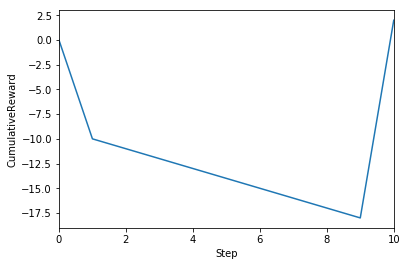

In [17]:
data.CumulativeReward.plot()
plt.xlabel("Step")
plt.ylabel("CumulativeReward")
plt.show()

we can see that now it reaches positive values.

In order to study the check this in a bigger scale we redefine the function that runs a episode in order to add the new policy function to select the optimal action in each state

In [18]:
def run_episode(env, policy):
    
    # Reset the enviroment
    state = env.reset()
    
    # Initialize data
    done = False
    data = pd.DataFrame(columns = ["State", "Action", "Reward","CumulativeReward"])
    
    # Run the loop
    while done == False:
    
        # Apply a greedy policy
        action = np.argmax(policy[state])
        next_state, reward, done, info = env.step(action = action)
    
        # Save the data
        data = data.append({"State"  : state,
                            "Action" : action,
                            "Reward" : reward,
                            "CumulativeReward": sum(data.Reward) + reward
                            }, ignore_index = True)
        
        # Go to the next step
        state = next_state
    
    return data

and check the distributions of the durations

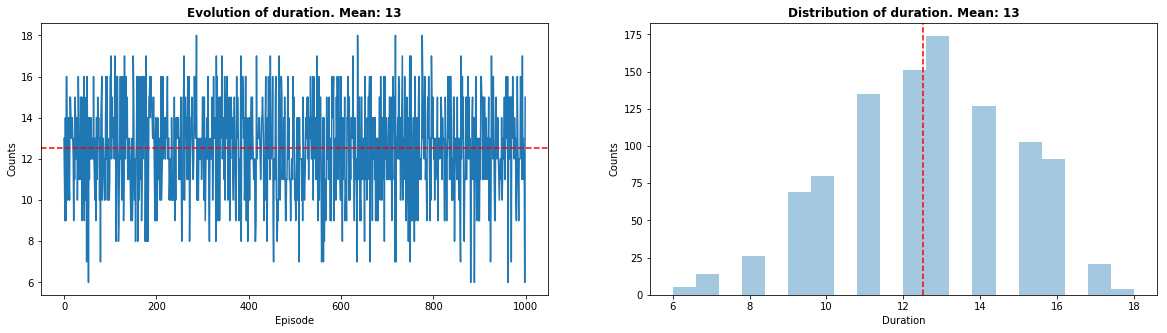

In [19]:
# Initialize
data_episodes = pd.DataFrame(columns = ["Counter"])

# Obtain the optimal policy for this enviroment
policy, V = policy_improvement(env)

# Run the loop
for counter_episodes in range(1000):
    
    # Run a episode
    results = run_episode(env, policy)
    
    # Save the data
    data_episodes = data_episodes.append({"Counter": results.shape[0]}, ignore_index = True)

plot_espisodes(data_episodes)

so we can see that the duration of an episode has decreased very dramatically.

## Value iteration

One thowback of the policy iteration algorithm is that it involves a policy evaluation in each of the iterations, which can be very computationaly expensive. We can truncate the policy evaluation without losing the convergence guarantied by policy iteration algorithm. This can be done simply changing the update rule for the value function to

$$ v_{k+1}(s) = \max_a \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s',r|s,a) \left[ r + \gamma v_k(s') \right] $$

this is known as Value Iteration algorithm and is based simply in the assumption of a greedy policy, which is true in the final optimal case.

In [20]:
def value_iteration(env, discount_factor = 0.9, theta = 0.00001):
    """
    Value Iteration Algorithm. Evaluates and improves the value function until an optimal value function is found.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        policy_eval_fn: Policy Evaluation function that takes 4 arguments: env, policy, discount_factor, theta.
        discount_factor: Gamma discount factor.
    
    Returns:
        policy: [nS, nA] shaped matrix representing the probabilities for the optimal policy.
        V: [nS] shaped matrix representing the value function for the optimal policy.
    """
    
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with random values (all 0)
    V = np.zeros(nS)
    count = 0
    while True:
        delta = 0
        
        # Run for all states        
        for state in range(nS):
            # Obtain the action values for this state and keep the best
            action_values = get_action_values(env, V, state, discount_factor)
            v = np.max(action_values)            

            # Compute the value function change
            delta = max(delta, np.abs(v - V[state]))
            
            # Save the new value function for this state
            V[state] = v
            
        # Stop evaluating at the given threshold
        count = count + 1
        
        if (delta < theta) | (count > 1000):
            break
            print(count)
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.env.nS, env.env.nA])
    for state in range(nS):
        # Obtain the action values for this state and keep the best
        action_values = get_action_values(env, V, state, discount_factor)
        best_action = np.argmax(action_values)
        
        # Always take the best action
        policy[state, best_action] = 1.0
            
    return policy, V

and checking the distribution again

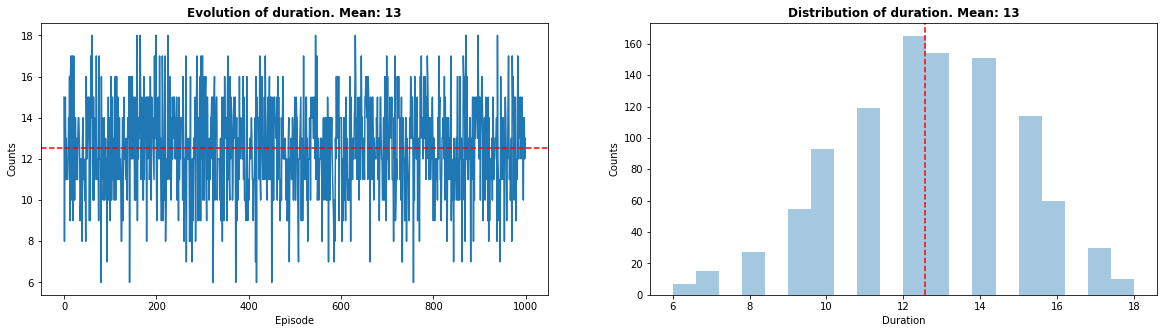

In [29]:
# Initialize
data_episodes = pd.DataFrame(columns = ["Counter"])

# Obtain the optimal policy for this enviroment
policy, V = value_iteration(env)

# Run the loop
for counter_episodes in range(1000):
    
    # Run a episode
    results = run_episode(env, policy)
    
    # Save the data
    data_episodes = data_episodes.append({"Counter": results.shape[0]}, ignore_index = True)

plot_espisodes(data_episodes)

we can see that we obtain exactly the same results but with a faster computation time.

# MonteCarlo methods

The methods of dynamic programming are very computiationally expensive when the number of states grow, so we need an alternative approach. One the most straigfoward approaches are Monte Carlo methods. Monte Carlo methods require only experience/sample sequences of states, actions, and rewards from actual, or simulated, interaction with an
environment. Learning from actual experience is striking because it requires no prior knowledge of the environment’s dynamics, yet can still attain optimal behavior. 

## The Blacjack enviroment

Noe we are going to use a more complex environment the Blackjack enviroment. The purpose of this game is to beat the punctuation of the dealer. We first create the enviroment

In [4]:
env = gym.make('Blackjack-v0') 

and study its especifications

In [17]:
print("observation_space: {}".format(env.observation_space))
print("action_space: {}".format(env.action_space))
print("reward_range: {}".format(env.reward_range))

observation_space: Tuple(Discrete(32), Discrete(11), Discrete(2))
action_space: Discrete(2)
reward_range: (-inf, inf)


where we can see that:
* The states are a tuple of PlayerSum (the player sum of points), DealerShowing (the card showed by the dealer) and UsableAce (a flag indicating if we have an ace that can be counted as 11 points).
* The actions correspond to stick (0) and hit (1).

## MonteCarlo Prediction

Suppose we wish to estimate $v_\pi (s)$, the value of a state $s$ under policy $\pi$, given a set of episodes obtained by following $\pi$ and passing through $s$. Each occurrence of state $s$ in a episode is called a visit to $s$.

### First-visit method

The first-visit MC method estimates $v_\pi (s)$ as the average of the returns following first visit to $s$ in each episode.

In [5]:
def mc_prediction_first(env, policy, num_episodes = 10000, discount_factor = 1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function for a given policy.
    
    Args:
        env: OpenAI gym environment.
        policy: A function that maps an observation to action probabilities.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        V: a [nS] dictionary that maps from states to values.
    """

    # Memory efficient count of returns for each state to calculate an average.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # Value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):

        # Generate an episode.
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, info = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states visited in this episode
        states_in_episode = set([tuple(x[0]) for x in episode])
        
        # Loop over each state
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            
            # Compute the return
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:][::-1])])
            
            # Update the value of this state
            returns_count[state] += 1.0
            returns_sum[state] += G
            V[state] = returns_sum[state] / returns_count[state]
            
    return V

Defining a sample policy

In [6]:
# Sample policy
def sample_policy(state):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = state
    
    if score >= 20:
        return 0 #Stick
    else:
        return 1 #Hit

we can make a example of use

In [14]:
def get_BlackJack_values(V):
    # Create a DataFrame with the states and the values
    df = pd.DataFrame(columns = ['PlayerSum','DealerShowing','UsableAce','Value'])
    for v_s in V.items():
        df = df.append({'PlayerSum'     : v_s[0][0],
                        'DealerShowing' : v_s[0][1],
                        'UsableAce'     : v_s[0][2],
                        'Value'         : v_s[1]
                        }, ignore_index = True)
    
    return df

In [15]:
# Evaluation
V_10k  = mc_prediction_first(env, sample_policy, num_episodes = 10000, discount_factor = 1.0)
V_500k = mc_prediction_first(env, sample_policy, num_episodes = 500000, discount_factor = 1.0)
print("Value Function (10000 steps):")
print(get_BlackJack_values(V_10k))
print("Value Function (500000 steps):")
print(get_BlackJack_values(V_10k))

Value Function (10000 steps):
    PlayerSum DealerShowing UsableAce     Value
0          11             1     False -0.155556
1          21             1     False  0.650602
2          18             1     False -0.705357
3          12             1     False -0.608247
4          13             6      True -0.090909
5          13             6     False -0.553398
6          17             1     False -0.831683
7          19             1     False -0.758065
8          20            10     False  0.486301
9          15            10     False -0.567961
10          4            10     False -0.608696
11         13            10     False -0.624113
12         18            10     False -0.696056
13         12             5     False -0.543210
14         16             5     False -0.678571
15         20             1     False  0.146853
16         16             2     False -0.660000
17         20             2     False  0.691358
18         13             4     False -0.653846
19        

and visualize the resulting value function

In [8]:
def plot_BlackJack_values(V):
    # Create a DataFrame with the states and the values
    df = pd.DataFrame(columns = ['PlayerSum','DealerShowing','UsableAce','Value'])
    for v_s in V.items():
        df = df.append({'PlayerSum'     : v_s[0][0],
                        'DealerShowing' : v_s[0][1],
                        'UsableAce'     : v_s[0][2],
                        'Value'         : v_s[1]
                        }, ignore_index = True)
    
    # Split in hands with usable/no usable ace
    df_usable   = df[df['UsableAce'] == True ].drop('UsableAce', axis = 1)
    df_nousable = df[df['UsableAce'] == False].drop('UsableAce', axis = 1)
    
    # Make the plots
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    sns.heatmap(data = df_usable.pivot_table(index = 'PlayerSum', 
                                             columns = 'DealerShowing', 
                                             values = 'Value')\
                                .sort_index(ascending = False),
                cmap = "YlGnBu",
                vmin = - 1, 
                vmax = 1)
    plt.title('UsableAce = True')
    plt.subplot(1,2,2)
    sns.heatmap(data = df_nousable.pivot_table(index = 'PlayerSum', 
                                               columns = 'DealerShowing', 
                                               values = 'Value')\
                                  .sort_index(ascending = False),
                cmap = "YlGnBu",
                vmin = - 1, 
                vmax = 1)
    plt.title('UsableAce = False')
    plt.show()

NUMBER OF EPISODES = 10000


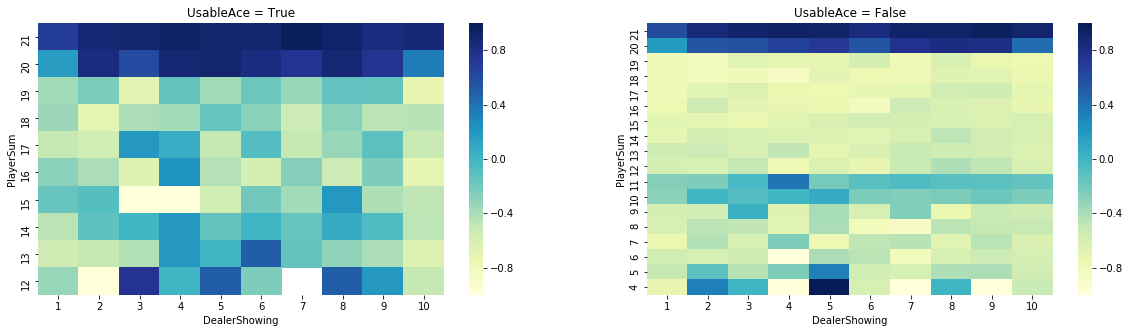

NUMBER OF EPISODES = 500000


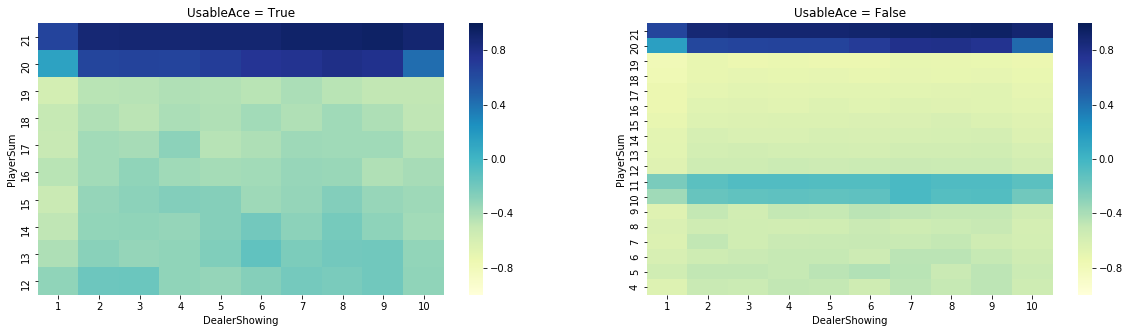

In [9]:
print('NUMBER OF EPISODES = 10000')
plot_BlackJack_values(V_10k)
print('NUMBER OF EPISODES = 500000')
plot_BlackJack_values(V_500k)

### Every-visit method

The every-visit MC method estimates $v_\pi (s)$ as the average of the returns following all visit to $s$ in each episode.

In [10]:
def mc_prediction_every(env, policy, num_episodes = 10000, discount_factor = 1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function for a given policy.
    
    Args:
        env: OpenAI gym environment.
        policy: A function that maps an observation to action probabilities.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        V: a [nS] dictionary that maps from states to values.
    """

    # Memory efficient count of returns for each state to calculate an average.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # Value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):

        # Generate an episode.
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, info = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states visited in this episode
        states_in_episode = [tuple(x[0]) for x in episode]
        rewards_in_episode = [x[2] for x in episode]
        
        # Loop over each state
        G = 0
        for (state, reward) in zip(states_in_episode[::-1], rewards_in_episode[::-1]):
            # Compute the return
            G += discount_factor * G + reward
            
            # Update the value of this state
            returns_count[state] += 1.0
            returns_sum[state] += G
            V[state] = returns_sum[state] / returns_count[state]
            
    return V

we can make a example of use

In [16]:
# Evaluation
V_10k  = mc_prediction_every(env, sample_policy, num_episodes = 10000, discount_factor = 1.0)
V_500k = mc_prediction_every(env, sample_policy, num_episodes = 500000, discount_factor = 1.0)
print("Value Function (10000 steps):")
print(get_BlackJack_values(V_10k))
print("Value Function (500000 steps):")
print(get_BlackJack_values(V_10k))

Value Function (10000 steps):
    PlayerSum DealerShowing UsableAce     Value
0          10             9     False  0.163265
1          20             9     False  0.755952
2          20             5     False  0.591837
3          15             5     False -0.663265
4          17             5     False -0.704762
5          11             3     False  0.021277
6           9             3     False -0.590909
7          18             3     False -0.747967
8          21             6     False  0.858974
9          14             6     False -0.638298
10         15            10      True -0.448980
11         13            10      True -0.416667
12         20            10      True  0.425287
13         21             5     False  0.828571
14         14             5     False -0.593750
15         10             5     False -0.166667
16         12             5     False -0.548387
17          4             5     False -0.250000
18          7             5     False -0.608696
19        

and visualize the resulting value function

NUMBER OF EPISODES = 10000


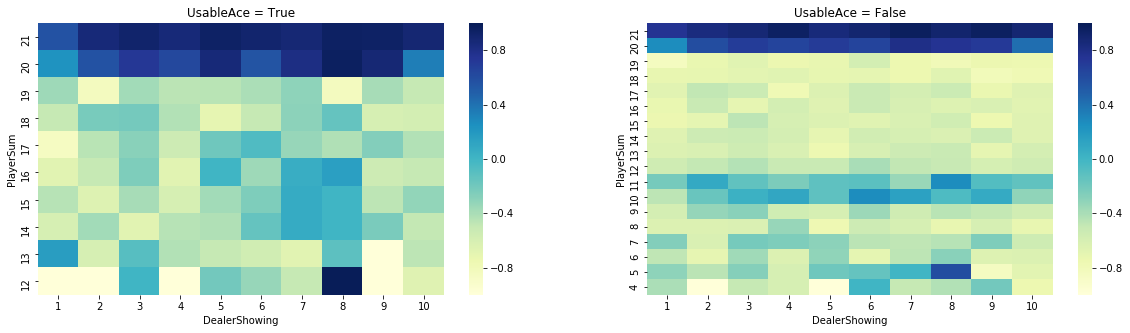

NUMBER OF EPISODES = 500000


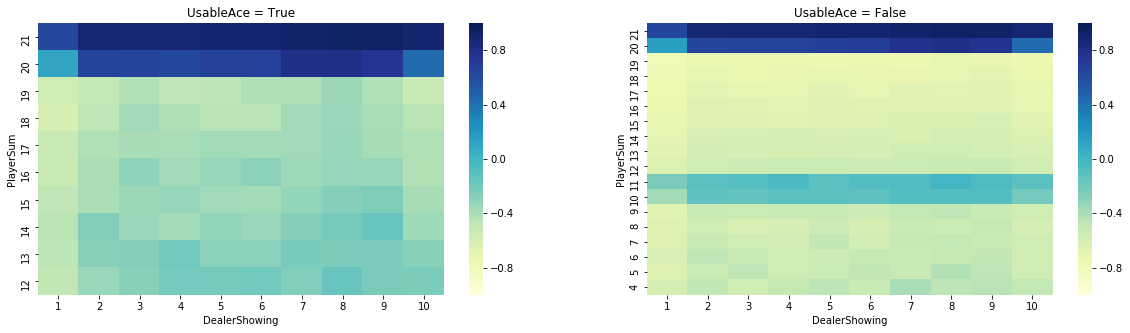

In [12]:
print('NUMBER OF EPISODES = 10000')
plot_BlackJack_values(V_10k)
print('NUMBER OF EPISODES = 500000')
plot_BlackJack_values(V_500k)

## MonteCarlo Control

Now we are going to use Monte Carlo estimation to approximate optimal policy. Te overall idea is to proceed according to the same pattern as in DP, according to the idea of GPI. To begin, let us consider a MC version of classical policy iteration.

### On-policy methods

The policy evaluation problem for action values is to estimate $q_\pi (s,a)$, the expected return when starting in state $s$, taking action $a$, and thereafter following policy $\pi$. The MC methods for this are essentially the same as just presented for state values, except now we talk about visits to a state-action pair rather tan to a state. A state action pair $(s,a)$ is said to be visited in an episode if ever the state $s$ is visited and the action $a$ is taken in it.

The only complication is that many state-action pairs may never be visited. For policy evaluation to work for action-value pairs, we must assure continual exploration. One way to do this is by specifying that episodes start in a state-action pair, and that every pair has a nonzero probability of being selected as the start.

Since OpenAi gym does not allow us to put the environment into a especific state, we are not implementing this algorithm but since we are using a high number of episodes in each run we expect to satisfy this idea anyway.

In [36]:
def make_epsilon_greedy_policy(env, Q, epsilon):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: Action-value function. A dictionary that maps from states to action values.
        epsilon: The probability to select a random action.
    
    Returns:
        policy: A function that takes the state as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    
    # Compute the number of actions
    nA = env.action_space.n
    
    # Define the policy function
    def policy(state):
        A = np.ones(nA, dtype = float) * epsilon / nA
        best_action = np.argmax(Q[state])
        A[best_action] += (1.0 - epsilon)
        return A
    
    return policy

In [64]:
def mc_control_first(env, num_episodes = 10000, discount_factor = 1.0, epsilon = 0.01):
    """
    Monte Carlo prediction algorithm. Calculates the value function for a given policy.
    
    Args:
        env: OpenAI gym environment.
        policy: A function that maps an observation to action probabilities.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        policy: A function that takes the state as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
        Q: a [nS,nA] dictionary that maps from state-action pairs to values.
    """

    # Memory efficient count of returns for each state to calculate an average.
    # Inside each dictionary we will include another dictionary for each action.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # Value function
    # Inside each dictionary we will include another dictionary (array) for each action.
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Create a e-soft policy for this Q
    policy = make_epsilon_greedy_policy(env, Q, epsilon)
    
    for i_episode in range(1, num_episodes + 1):

        # Generate an episode.
        episode = []
        state = env.reset()
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, info = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states visited in this episode
        state_action_pair_in_episode = set([(x[0], x[1]) for x in episode])
        
        # Loop over each state
        for (state, action) in state_action_pair_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if (x[0], x[1]) == (state, action))
            
            # Compute the return
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:][::-1])])
            
            # Update the value of this state
            returns_count[(state, action)] += 1.0
            returns_sum[(state, action)] += G
            Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
            
    return policy, Q

so in order to plot we have to recover the value function from the action-value function

In [65]:
def get_V_from_Q(Q):
    '''
    Recover value function V from action-value function Q.
    
    Args:
        Q: action-value function. A dictionary
    '''
    # Initialize the dictionary
    V = defaultdict(float)
    for (state, actions) in Q.items():
        # Get the value of the best action 
        action_value = np.max(actions)
        
        # Set it as the value of the state
        V[state] = action_value
        
    return V

and we can see the new value functions

In [74]:
policy_10k, Q_10k = mc_control_first(env, num_episodes = 10000, discount_factor = 1.0)
V_10k = obtain_V_from_Q(Q_10k)
policy_500k, Q_500k = mc_control_first(env, num_episodes = 500000, discount_factor = 1.0)
V_500k = obtain_V_from_Q(Q_500k)

print("Value Function (10000 steps):")
print(get_BlackJack_values(V_10k))
print("Value Function (500000 steps):")
print(get_BlackJack_values(V_500k))

Value Function (10000 steps):
    PlayerSum DealerShowing UsableAce     Value
0          20             8     False  0.862069
1          15             6     False -0.228571
2          20             2     False  0.666667
3          16             6     False -0.224490
4          13             7     False -0.476923
5          15            10     False -0.551237
6          13             1     False -0.535714
7          13             4     False -0.323529
8           9            10     False -0.254545
9          18            10     False -0.279476
10          8             6     False  0.055556
11         16             5     False -0.250000
12         17             4     False -0.045455
13         13            10     False -0.634551
14         20             1     False  0.195876
15         19             1      True -0.250000
16         10            10     False -0.460317
17         13             9     False -0.400000
18         19            10     False  0.040650
19        

and visualize them

NUMBER OF EPISODES = 10000


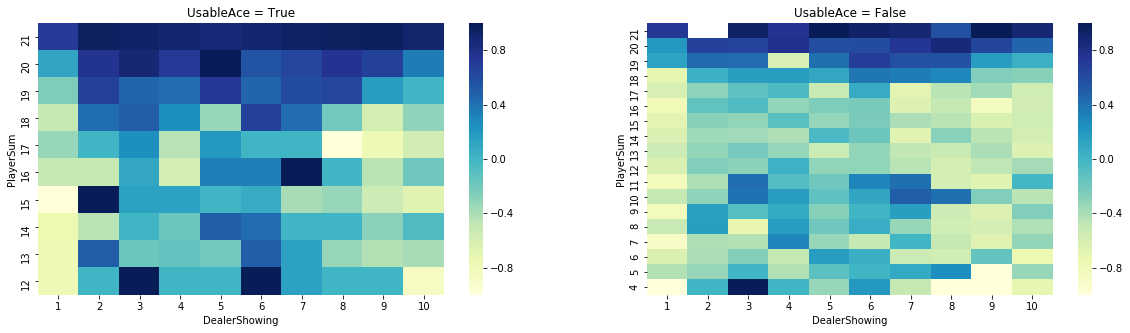

NUMBER OF EPISODES = 500000


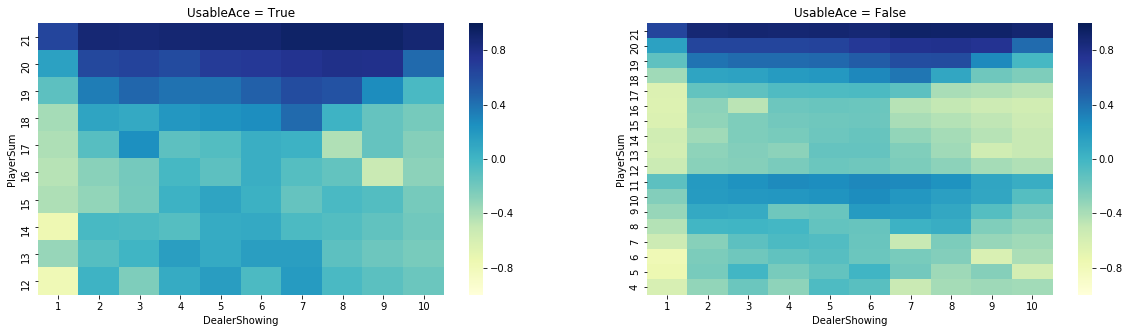

In [75]:
print('NUMBER OF EPISODES = 10000')
plot_BlackJack_values(V_10k)
print('NUMBER OF EPISODES = 500000')
plot_BlackJack_values(V_500k)

so we can see improvements in the hability of our algorithm since the value has increased in almost al regions. In order to study this in more detail we can also examine the policy

In [138]:
def get_BlackJack_policy(policy, V):
    # Create a DataFrame with the states, the values and the action to perform
    df = pd.DataFrame(columns = ['PlayerSum','DealerShowing','UsableAce','Value','Action'])
    for v_s in V.items():
        # Translate the action
        if np.argmax(policy(v_s[0])) == 0:
            action = 'Stick'
        else:
            action = 'Hit'
        
        # Append the data
        df = df.append({'PlayerSum'     : v_s[0][0],
                        'DealerShowing' : v_s[0][1],
                        'UsableAce'     : v_s[0][2],
                        'Value'         : v_s[1],
                        'Action'        : action
                        }, ignore_index = True)
    
    return df

In [139]:
print("Policy (10000 steps):")
print(get_BlackJack_policy(policy_10k, V_10k))
print("Policy (500000 steps):")
print(get_BlackJack_policy(policy_500k, V_500k))

Policy (10000 steps):
    PlayerSum DealerShowing UsableAce     Value Action
0          20             8     False  0.862069  Stick
1          15             6     False -0.228571  Stick
2          20             2     False  0.666667  Stick
3          16             6     False -0.224490  Stick
4          13             7     False -0.476923  Stick
5          15            10     False -0.551237    Hit
6          13             1     False -0.535714  Stick
7          13             4     False -0.323529  Stick
8           9            10     False -0.254545    Hit
9          18            10     False -0.279476  Stick
10          8             6     False  0.055556    Hit
11         16             5     False -0.250000  Stick
12         17             4     False -0.045455  Stick
13         13            10     False -0.634551  Stick
14         20             1     False  0.195876  Stick
15         19             1      True -0.250000  Stick
16         10            10     False -0.46

and visualize it

In [146]:
def plot_BlackJack_policy(policy, V):
    # Create a DataFrame with the states and the actions to perform
    df = pd.DataFrame(columns = ['PlayerSum','DealerShowing','UsableAce','Action'])
    for v_s in V.items():
        df = df.append({'PlayerSum'     : v_s[0][0],
                        'DealerShowing' : v_s[0][1],
                        'UsableAce'     : v_s[0][2],
                        'Action'        : float(np.argmax(policy(v_s[0])))
                        }, ignore_index = True)
    
    
    # Split in hands with usable/no usable ace
    df_usable   = df[df['UsableAce'] == True ].drop('UsableAce', axis = 1)
    df_nousable = df[df['UsableAce'] == False].drop('UsableAce', axis = 1)
    
    # Make the plots
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    sns.heatmap(data = df_usable.pivot_table(index = 'PlayerSum', 
                                             columns = 'DealerShowing', 
                                             values = 'Action')\
                                .sort_index(ascending = False),
                cmap = "RdYlGn",
                vmin = 0, 
                vmax = 1)
    plt.title('UsableAce = True')
    plt.subplot(1,2,2)
    sns.heatmap(data = df_nousable.pivot_table(index = 'PlayerSum', 
                                               columns = 'DealerShowing', 
                                               values = 'Action')\
                                  .sort_index(ascending = False),
                cmap = "RdYlGn",
                vmin = 0, 
                vmax = 1)
    plt.title('UsableAce = False')
    plt.show()

NUMBER OF EPISODES = 10000


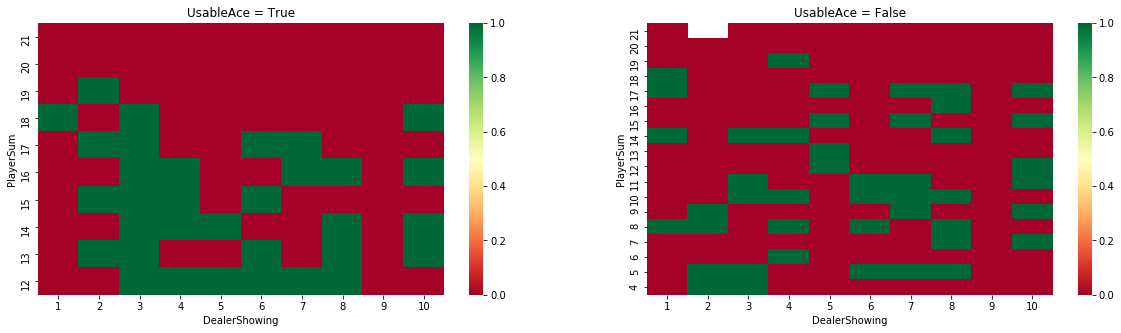

NUMBER OF EPISODES = 500000


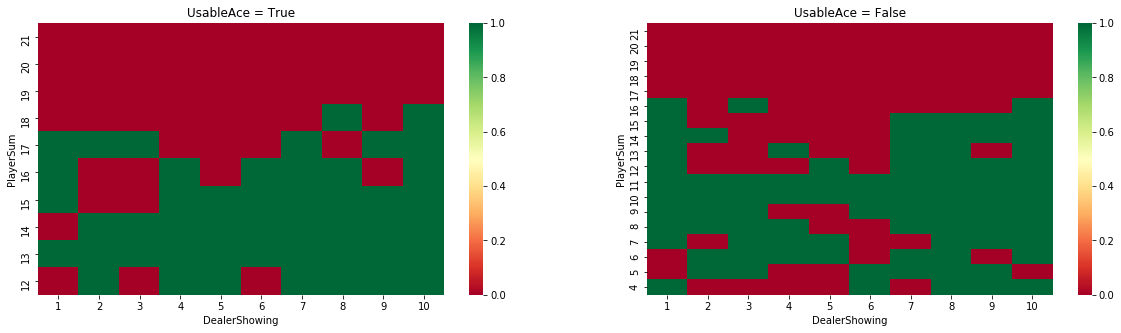

In [147]:
print('NUMBER OF EPISODES = 10000')
plot_BlackJack_policy(policy_10k, V_10k)
print('NUMBER OF EPISODES = 500000')
plot_BlackJack_policy(policy_500k, V_500k)

where the 0 action (red) correspond to stick and the 1 action (green) correspond to hit.

### Off-policy methods

# Temporal difference methods

## On-policy: Sarsa

## Off-policy: Q-learing